In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import scipy.special as sp
import os 
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from dgutils import colors as colortools

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/sf.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize'] 

style_file = plot_style['aps']
plt.rcParams['text.usetex']=False

In [2]:
filenames=os.listdir('../data/ed')
filenamesdmrg = os.listdir('../data/dmrg')

In [3]:
try:
    filenames.remove('.ipynb_checkpoints')
    filenamesdmrg.remove('.ipynb_checkpoints')
except:
    pass

In [4]:
ratios=[2,3,4,5,6,7,8]
def getkey(n,N):
    ratio=N/n
    if ratio in ratios:
        key = f'{int(ratio)}'
        return key
    else:
        return False

In [5]:
def addData(α,v, Nvalues, Svalues):
    for i in range(len(filenames)):    
        fn = filenames[i]
        n = int(fn.split("_")[2][1:])
        N = int(fn.split("_")[4][1:])
        key=getkey(n,N)
        if key != False:
            with open('../data/ed/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/ed/'+fn,encoding="utf-8")    
            try:
                V  = data[:,0]
                S = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S = np.array([data[α]])
            if v in V:
                idx = np.where(V==v)
                Nvalues[key].append(N)
                Svalues[key].append(S[idx])
    for i in range(len(filenamesdmrg)):    
        fn = filenamesdmrg[i]
        n = int(fn.split("_")[2][1:])
        N = int(fn.split("_")[4][1:])
        key=getkey(n,N)
        if key != False:
            with open('../data/dmrg/'+fn,"r",encoding="utf-8",errors='ignore') as file:
                lines = file.readlines()
                nLines = len(lines)
            data = np.loadtxt('../data/dmrg/'+fn,encoding="utf-8")    
            try:
                V  = data[:,0]
                S = data[:,α]
            except IndexError:
                V = np.array([data[0]])
                S = np.array([data[α]])
            if v in V:
                if N not in Nvalues[key]:
                    idx = np.where(V==v)
                    Nvalues[key].append(N)
                    Svalues[key].append(S[idx])

In [6]:
α=1
v=1.75
N2=[]
N3=[]
N4=[]
N5=[]
N6=[]
N7=[]
N8=[]
S2=[]
S3=[]
S4=[]
S5=[]
S6=[]
S7=[]
S8=[]
Nvalues={'2':N2,'3':N3,'4':N4,'5':N5,'6':N6,'7':N7,'8':N8}
Svalues={'2':S2,'3':S3,'4':S4,'5':S5,'6':S6,'7':S7,'8':S8}
addData(α,v,Nvalues, Svalues)

In [7]:
def fitfunc(x,a,b):
    return a*x+b
from scipy.optimize import curve_fit

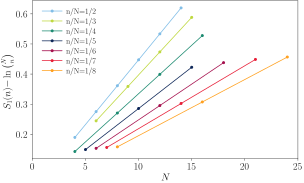

In [8]:
colors=["#7EBCE6","#bdd73c","#1A896F","#0B2456",'#A40E4C',"#E71D36","#FF9F1C"]
Sarrays=[S2,S3,S4,S5,S6,S7,S8]
Narrays=[N2,N3,N4,N5,N6,N7,N8]
ratios=[2,3,4,5,6,7,8]
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    for i in range(len(Nvalues)):
        Sarray = np.array(Sarrays[i])
        Sarray = Sarray.reshape((-1,))
        Narray = Narrays[i]
        fit, cov = curve_fit(fitfunc,Narray,Sarray)
        perr=np.sqrt(np.diag(cov))
        ratio = ratios[i]
        #plt.plot(Narray,Sarray,marker='o',ms=2,color=colors[i],label=(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1])))
        plt.plot(Narray,Sarray,marker='o',ms=2,color=colors[i],label=(rf'n/N=1/{ratio}'))
        #plt.text(Narray[-1]+2.4,Sarray[-1],f"N/n={ratio}",ha="right",va="center",size='xx-small')
    plt.xlabel(r'$N$')
    plt.xlim(0,25)
    plt.ylabel(rf'$S_{α}(n)$'+r'$-\ln{N \choose n}$')
    plt.legend(loc="upper left",bbox_to_anchor=(.01,1),fontsize=8)

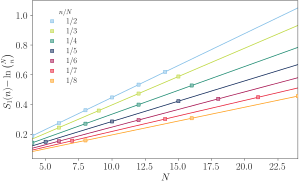

In [33]:

Sarrays=[S2,S3,S4,S5,S6,S7,S8]
Narrays=[N2,N3,N4,N5,N6,N7,N8]
ratios=[2,3,4,5,6,7,8]
plt.style.reload_library()
with plt.style.context('../include/IOP.mplstyle'):
    for i in range(len(Nvalues)):
        Sarray = np.array(Sarrays[i])
        Sarray = Sarray.reshape((-1,))
        Narray = Narrays[i]
        fit, cov = curve_fit(fitfunc,Narray,Sarray)
        perr=np.sqrt(np.diag(cov))
        ratio = ratios[i]
        N=np.linspace(4,24,20)
        plt.plot(N,fitfunc(N,*fit),color=colors[i])
        #plt.plot(Narray,Sarray,marker='o',ms=2,color=colors[i],label=(rf'N/n={ratio},$S_\alpha=(%.3e\pm%.3e)N+%.3e\pm%.3e$'% (fit[0],perr[0],fit[1],perr[1])))
        plt.scatter(Narray,Sarray,marker='s',linewidths=0.5,s=10,
                        c=colortools.get_alpha_hex(colors[i],0.5),zorder=10, edgecolors=colors[i],label=(rf'1/{ratio}'))
    plt.text(7.2,1.02,r'$n/N$',ha="right",va="center",size='x-small')
    plt.xlabel(r'$N$')
    plt.xlim(4,24)
    plt.ylabel(rf'$S_{α}(n)$'+r'$-\ln{N \choose n}$')
    plt.legend(loc="upper left",bbox_to_anchor=(.01,.94),fontsize=8)
    plt.savefig('../figures/alpha1v1.75fixedratios.pdf')